In [10]:
import pandas as pd
import numpy as np
import ast
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # poner este como metrica
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
!pip install pandas-profiling
!pip install missingno
!pip install sweetviz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 77.0 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
dfmerge = pd.read_csv('/content/drive/MyDrive/merged_data3.csv', parse_dates=['release_date'])

dfmerge.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return,ActorNames,DirectorNames
0,Toy Story Collection,30000000,"Animation, Comedy, Family",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,...,English,Released,NaN,Toy Story,7.7,5415.0,1995,12.451801,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter
1,NaN,65000000,"Adventure, Fantasy, Family",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"TriStar Pictures, Teitler Film, Interscope Com...",United States of America,1995-12-15,...,"English, Français",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995,4.043035,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",Joe Johnston
2,Grumpy Old Men Collection,0,"Romance, Comedy",15602,en,A family wedding reignites the ancient feud be...,11.712900,"Warner Bros., Lancaster Gate",United States of America,1995-12-22,...,English,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995,0.000000,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...",Howard Deutch
3,NaN,16000000,"Comedy, Drama, Romance",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,Twentieth Century Fox Film Corporation,United States of America,1995-12-22,...,English,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,1995,5.090760,"Whitney Houston, Angela Bassett, Loretta Devin...",Forest Whitaker
4,Father of the Bride Collection,0,Comedy,11862,en,Just when George Banks has recovered from his ...,8.387519,"Sandollar Productions, Touchstone Pictures",United States of America,1995-02-10,...,English,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995,0.000000,"Steve Martin, Diane Keaton, Martin Short, Kimb...",Charles Shyer


In [4]:
# Verificar las columnas en DataFrames

dfmerge.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'release_year', 'return', 'ActorNames', 'DirectorNames'],
      dtype='object')

**las columnas "popularity", "id", "vote_count" y "vote_average" no tienen valores nulos:
Ignoramos las otras columnas con valores nulos: Si las columnas con valores nulos no son relevantes para nuestro sistema de recomendación, optaremos por ignorar esas columnas y enfocarte en las columnas que sí tienen información completa y son importantes para generar las recomendaciones.**


In [5]:
dfmerge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43097 entries, 0 to 43096
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  4442 non-null   object        
 1   budget                 43097 non-null  int64         
 2   genres                 41391 non-null  object        
 3   id                     43097 non-null  int64         
 4   original_language      43090 non-null  object        
 5   overview               42224 non-null  object        
 6   popularity             43097 non-null  float64       
 7   production_companies   33112 non-null  object        
 8   production_countries   38183 non-null  object        
 9   release_date           43097 non-null  datetime64[ns]
 10  revenue                43097 non-null  float64       
 11  runtime                42878 non-null  float64       
 12  spoken_languages       40249 non-null  object        
 13  s

In [7]:
dfmerge.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,return
count,4.309700e+04,43097.000000,43097.000000,4.309700e+04,42878.000000,43097.000000,43097.000000,43097.000000,4.309700e+04
mean,4.460174e+06,104047.320440,3.068686,1.182921e+07,95.819511,5.670896,115.726942,1991.654872,6.949457e+02
std,1.787007e+07,110607.690978,6.133948,6.601850e+07,36.737938,1.822964,503.949801,23.912476,7.664266e+04
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1878.000000,0.000000e+00
25%,0.000000e+00,25195.000000,0.454020,0.000000e+00,86.000000,5.000000,4.000000,1978.000000,0.000000e+00
50%,0.000000e+00,56402.000000,1.233068,0.000000e+00,95.000000,6.000000,11.000000,2001.000000,0.000000e+00
75%,0.000000e+00,144271.000000,4.016430,0.000000e+00,107.000000,6.800000,37.000000,2010.000000,0.000000e+00
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,1.239638e+07


**Pandas Profiling: Esta librería te permite generar un informe completo con
 estadísticas y visualizaciones sobre tus datos. Puedes obtener información
 sobre la distribución de las variables, correlaciones, valores ausentes, outliers, entre otros**

In [16]:
import pandas_profiling as pp

# Generar el informe de pandas profiling
report = pp.ProfileReport(dfmerge)

# Guardar el informe en un archivo HTML
report.to_file("reporte.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Missingno: Esta librería te permite visualizar los valores ausentes en tus datos de manera intuitiva.En este caso vemos que no afecta a nuestras columnas importantes: "popularity", "id", "vote_count" y "vote_average"**

<Axes: >

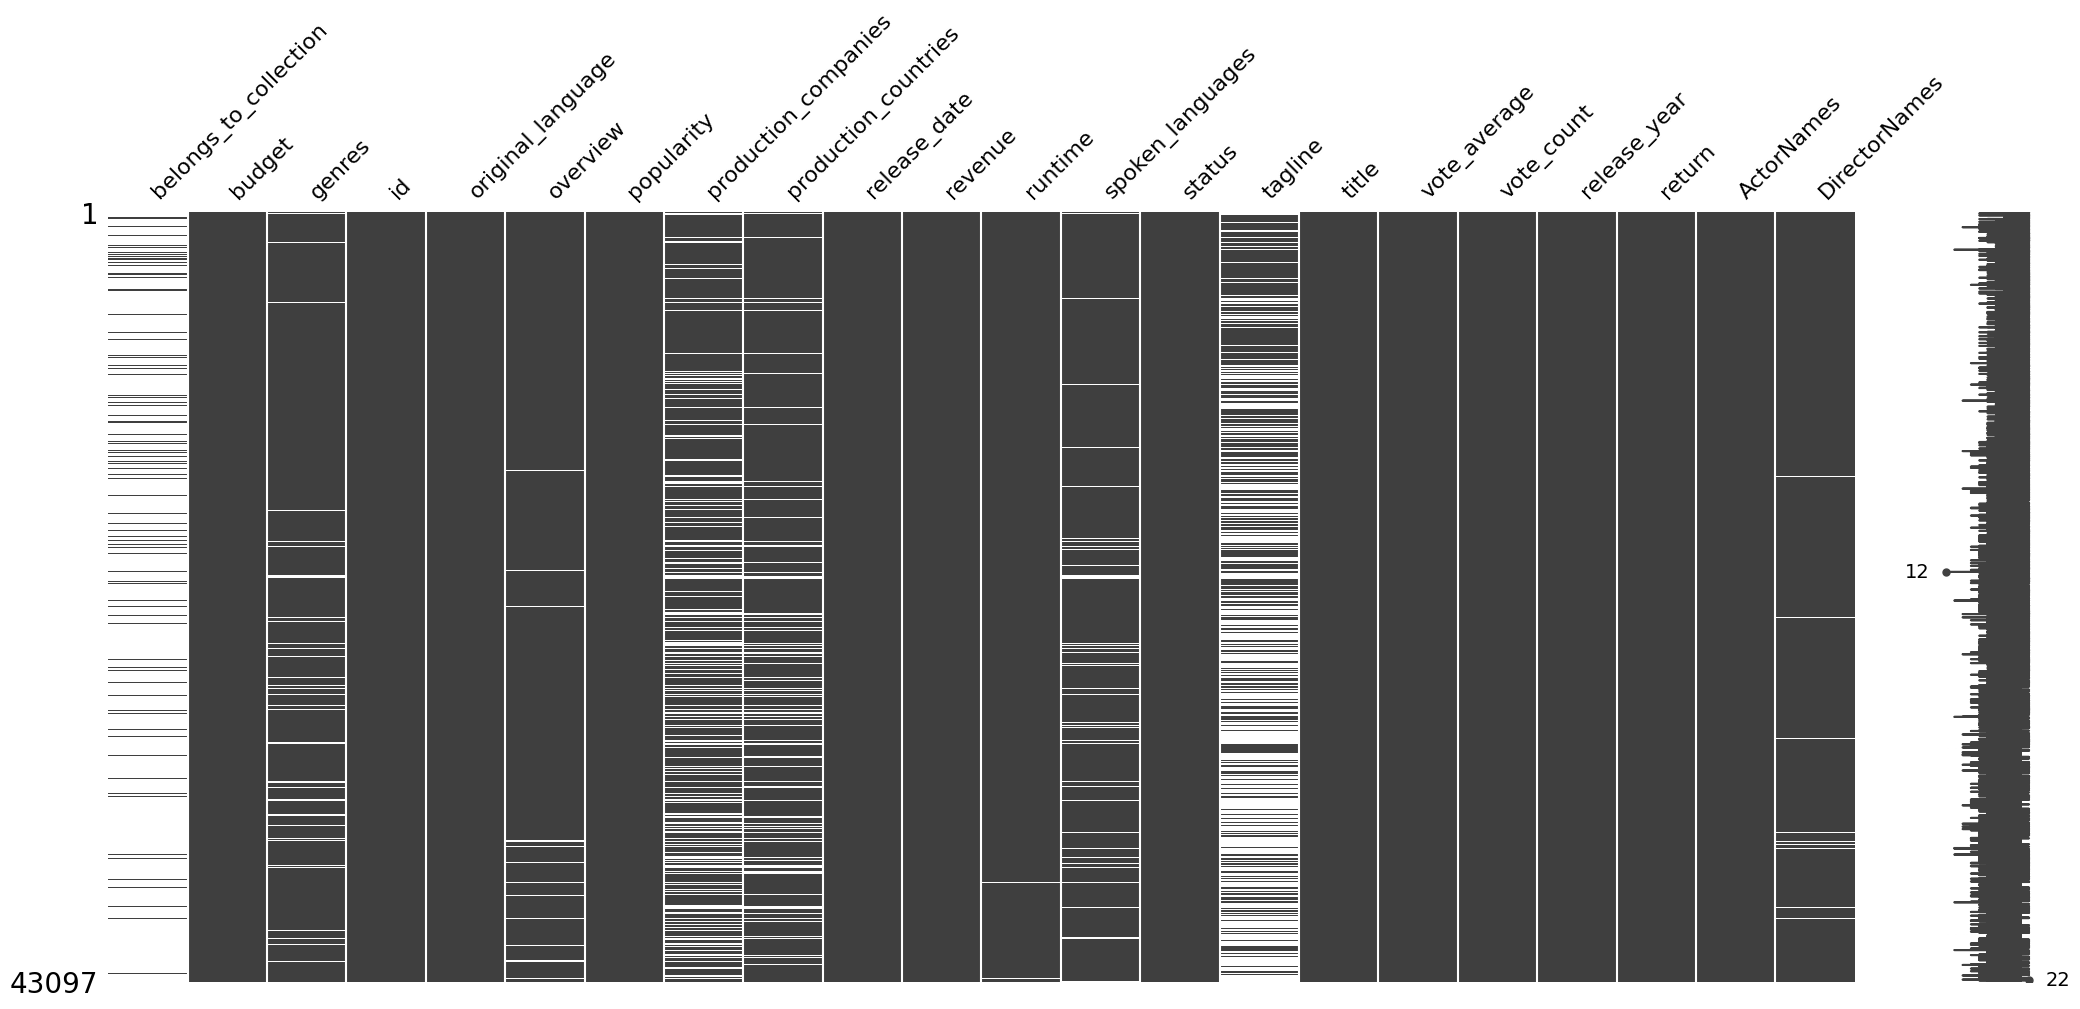

In [17]:
import missingno as msno

# Visualizar los valores ausentes
msno.matrix(dfmerge)

**Sweetviz: Esta librería genera un informe visual completo sobre tus datos, incluyendo estadísticas descriptivas, distribuciones, correlaciones, entre otros**

In [18]:
import sweetviz as sv

# Generar el informe de Sweetviz
report = sv.analyze(dfmerge)

# Mostrar el informe
report.show_html()

/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.m

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Trabajando con las tres columnas ("vote_average", "vote_count" y "popularity") para calcular el top de las películas.
Asiganamos un peso a cada una de las columnas y luego calculamos una puntuación combinada para cada película. Por ejemplo, podrías asignar un peso mayor a "vote_count" y "popularity" para enfocarte en la popularidad de las películas, y un peso menor a "vote_average" para considerar la calificación promedio. Luego, puedes sumar o promediar estas puntuaciones ponderadas para obtener una puntuación final y clasificar las películas en función de ella.**

In [21]:
'''
 Asignar pesos a las columnas "vote_average", "vote_count" y "popularity"
  para calcular una nueva columna llamada "score_final" que combine estas tres métricas.
  Esto nos permitirá tener una medida agregada que tenga en cuenta diferentes aspectos de la película.
'''

# Definir los pesos de cada métrica
weight_vote_average = 0.4
weight_vote_count = 0.3
weight_popularity = 0.5

# Calcular el score final utilizando los pesos y las columnas correspondientes
dfmerge['score_final'] = (dfmerge['vote_average'] * weight_vote_average +
                          dfmerge['vote_count'] * weight_vote_count +
                          dfmerge['popularity'] * weight_popularity)
# Redondear el score_final a 2 decimales
dfmerge['score_final'] = round(dfmerge['score_final'], 2)


## **Exploración del Dataset**

In [25]:
df_filtered = dfmerge[['id', 'genres', 'score_final']]

df_filtered

,id,genres,score_final
0,862,"Animation, Comedy, Family",1638.55
1,8844,"Adventure, Fantasy, Family",735.17
2,15602,"Romance, Comedy",36.06
3,31357,"Comedy, Drama, Romance",14.57
4,11862,Comedy,58.37
...,...,...,...
43092,222848,Science Fiction,2.03
43093,30840,"Drama, Action, Romance",12.92
43094,111109,Drama,4.59
43095,67758,"Action, Drama, Thriller",3.77


In [28]:
'''#Exportando:
# Especifica la ruta y el nombre de archivo para guardar el dataset convertido
ruta_archivo_convertido = '/content/drive/MyDrive/merged_data4.csv'

# Exporta el DataFrame con la columna convertida al archivo CSV

df_filtered.to_csv(ruta_archivo_convertido, index=False)'''



In [29]:
dfmerge = pd.read_csv('/content/drive/MyDrive/merged_data4.csv')

dfmerge.head()

,id,genres,score_final
0,862,"Animation, Comedy, Family",1638.55
1,8844,"Adventure, Fantasy, Family",735.17
2,15602,"Romance, Comedy",36.06
3,31357,"Comedy, Drama, Romance",14.57
4,11862,Comedy,58.37


In [32]:
# Verificar las columnas en DataFrames

dfmerge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43097 entries, 0 to 43096
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           43097 non-null  int64  
 1   genres       41391 non-null  object 
 2   score_final  43097 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1010.2+ KB


In [40]:


# Separa los géneros en listas, manejando los valores faltantes
dfmerge ['genres'] = dfmerge ['genres'].apply(lambda x: x.split(", ") if isinstance(x, str) else [])


# Crea un DataFrame donde cada género es una columna
genres_df = dfmerge ['genres'].str.join('|').str.get_dummies()

# Une el DataFrame original y el DataFrame de géneros
df_final = pd.concat([dfmerge , genres_df], axis=1)


In [41]:
dfmerge.head()

,id,genres,score_final
0,862,"[Animation, Comedy, Family]",1638.55
1,8844,"[Adventure, Fantasy, Family]",735.17
2,15602,"[Romance, Comedy]",36.06
3,31357,"[Comedy, Drama, Romance]",14.57
4,11862,[Comedy],58.37


In [44]:
# Calcula la media del 'score_final' para cada género
mean_scores = genres_df.apply(lambda x: dfmerge['score_final'][x == 1].mean())
mean_scores


Action              82.649023
Adventure          129.161050
Animation           84.655907
Comedy              36.924764
Crime               57.569907
Documentary          7.928403
Drama               33.092869
Family              78.760880
Fantasy            107.285303
Foreign              5.178735
History             37.647814
Horror              34.448347
Music               24.749415
Mystery             54.344407
Romance             32.785363
Science Fiction    102.805057
TV Movie             9.421632
Thriller            61.181682
War                 40.791699
Western             26.117973
dtype: float64

In [49]:
from sklearn.preprocessing import MultiLabelBinarizer

# Inicializar MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Aplicar MultiLabelBinarizer a la columna 'genres'
genres_encoded = mlb.fit_transform(dfmerge['genres'])

# Crear un DataFrame a partir de los géneros codificados
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_, index=dfmerge.index)

# Unir el DataFrame original y el DataFrame de géneros
df_final = pd.concat([dfmerge, genres_df], axis=1)



In [51]:
df_final.head()

,id,genres,score_final,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,862,"[Animation, Comedy, Family]",1638.55,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8844,"[Adventure, Fantasy, Family]",735.17,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15602,"[Romance, Comedy]",36.06,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,31357,"[Comedy, Drama, Romance]",14.57,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,11862,[Comedy],58.37,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43097 entries, 0 to 43096
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               43097 non-null  int64  
 1   genres           43097 non-null  object 
 2   score_final      43097 non-null  float64
 3   Action           43097 non-null  int64  
 4   Adventure        43097 non-null  int64  
 5   Animation        43097 non-null  int64  
 6   Comedy           43097 non-null  int64  
 7   Crime            43097 non-null  int64  
 8   Documentary      43097 non-null  int64  
 9   Drama            43097 non-null  int64  
 10  Family           43097 non-null  int64  
 11  Fantasy          43097 non-null  int64  
 12  Foreign          43097 non-null  int64  
 13  History          43097 non-null  int64  
 14  Horror           43097 non-null  int64  
 15  Music            43097 non-null  int64  
 16  Mystery          43097 non-null  int64  
 17  Romance     



¿Cuáles son los géneros más comunes en las películas con alto score final?

¿Existen correlaciones entre el género de una película y su score final?

¿Cómo se distribuye el score final en los diferentes géneros de películas?


¿Existen películas con géneros poco comunes pero que tienen un score final alto?


 ¿Cuáles son los géneros más populares entre las películas con bajo score final?

 **¿Cuántos usuarios únicos hay en nuestra base de datos?

¿Cuántas películas calificó cada usuario?

¿Cómo es la distribución de las calificaciones?¿Pueden concluir algo de ese gráfico?

¿Cuál es la película con más calificaciones?¿Cuántas tiene?¿Y la que menos calificaciones tiene?

¿Cuáles son las películas con el score final más alto?

# ¿Cuáles son los géneros más comunes en las películas con alto score final?

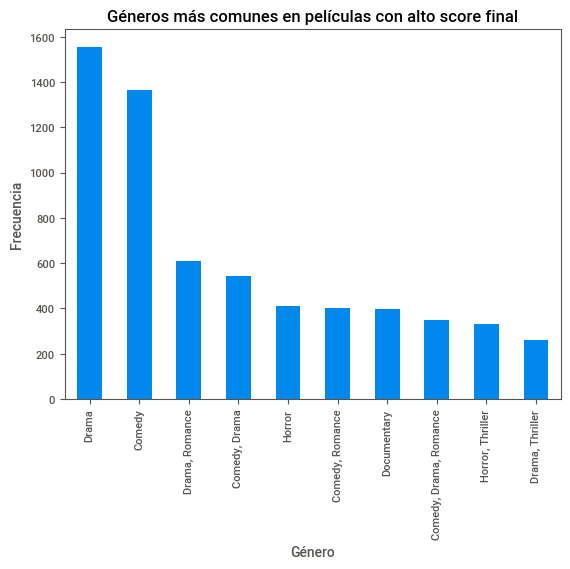

In [56]:
import matplotlib.pyplot as plt

# Limita el número de géneros a mostrar en el gráfico
num_generos_mostrar = 10

# Genera el gráfico de barras de los géneros más comunes
generos_comunes[:num_generos_mostrar].plot(kind='bar')
plt.title('Géneros más comunes en películas con alto score final')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()




In [65]:
#En Base a ello solo nos quedaremos con : Las 4 TOp: Drama, Comedy,  Horror y Romance y adicionamos :genres,id,score_final
# Filtrar las columnas y los géneros deseados
df_filtered_genres = df_final[[ 'id', 'score_final', 'Drama', 'Comedy', 'Horror', 'Romance']]

# Filtrar las filas con los 4 géneros principales
df_filtered_genres_top = df_filtered_genres[df_filtered_genres['Drama'] == 1]
df_filtered_genres_top = df_filtered_genres_top.append(df_filtered_genres[df_filtered_genres['Comedy'] == 1])
df_filtered_genres_top = df_filtered_genres_top.append(df_filtered_genres[df_filtered_genres['Horror'] == 1])
df_filtered_genres_top = df_filtered_genres_top.append(df_filtered_genres[df_filtered_genres['Romance'] == 1])

df_filtered_genres

<ipython-input-65-4963924d4ffc>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_filtered_genres_top = df_filtered_genres_top.append(df_filtered_genres[df_filtered_genres['Comedy'] == 1])
<ipython-input-65-4963924d4ffc>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_filtered_genres_top = df_filtered_genres_top.append(df_filtered_genres[df_filtered_genres['Horror'] == 1])
<ipython-input-65-4963924d4ffc>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_filtered_genres_top = df_filtered_genres_top.append(df_filtered_genres[df_filtered_genres['Romance'] == 1])


,id,score_final,Drama,Comedy,Horror,Romance
0,862,1638.55,0,1,0,0
1,8844,735.17,0,0,0,0
2,15602,36.06,0,1,0,1
3,31357,14.57,1,1,0,1
4,11862,58.37,0,1,0,0
...,...,...,...,...,...,...
43092,222848,2.03,0,0,0,0
43093,30840,12.92,1,0,0,1
43094,111109,4.59,1,0,0,0
43095,67758,3.77,1,0,0,0


In [66]:
#Exportando:
# Especifica la ruta y el nombre de archivo para guardar el dataset convertido
ruta_archivo_convertido = '/content/drive/MyDrive/merged_data5.csv'

# Exporta el DataFrame con la columna convertida al archivo CSV

df_filtered_genres.to_csv(ruta_archivo_convertido, index=False)

In [68]:
dfmerge = pd.read_csv('/content/drive/MyDrive/merged_data5.csv')

dfmerge.head()

,id,score_final,Drama,Comedy,Horror,Romance
0,862,1638.55,0,1,0,0
1,8844,735.17,0,0,0,0
2,15602,36.06,0,1,0,1
3,31357,14.57,1,1,0,1
4,11862,58.37,0,1,0,0
